In [ ]:
import sklearn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
variazione_codici_istat = pd.DataFrame({
    "codice_comune_alfanumerico":[1],
    "codice_comune_associato_alla_variazione":[1],
    "codice_comune_flag_valido":[1],
    "cod_istat_comune":[1],
    "cod_istat_comune_valido":[1],
    "cod_regione_flag_valido":[1],
    "cod_uts_flag_valido":[1],
    "cod_variazione":[1],
    "data_costituzione":["20-09-1998"],
    "data_estinzione":["20-09-1998"],
    "data_evento":["20-09-1998"],
    "denominazione_comune":["MILANO"],
    "denominazione_comune_associato_alla_variazione":["MILANO"],
    "flag_valido":[1],
    "sigla_automobilistica":["MI"]
})

dati_reddito_imponibile= pd.DataFrame({
    "cod_istat":[1],
    "nome_comune": "MILANO",
    "provincia": "MI",
    "regione":"lombardia",
    "occupate":[1000],
    "non_occupate": [300],
    "ral_media": [33000]
})


indicatori_turismo=pd.DataFrame({
    "cod_istat_comune":[1],
    "nome_comune":["MILANO"],
    "tipologia_territoriale":["D3"],
    "presenze":[1],
    "anno":[2022]
})

dati_geografici_clean=pd.DataFrame({
    "codice_regione": [1],
    "superficie":[2000],
    "altitudine":[50],
    "codice_provincia":["MI"],
    "cod_istat_comune":[1],
    "nome_regione":["LOMBARDIA"]
})

istruzione=pd.DataFrame({
    "cod_istat":[1],
    "perc_licenza_media":[0.1],
    "perc_diploma":[0.4],
    "perc_istruzione_universitaria":[0.3]
})
dati_demografici_eta_media = pd.DataFrame({
    "cod_istat":[1],
    "nome_comune":["MILANO"],
    "valore":[45.3]
})
dati_demografici_2022=pd.DataFrame({
    "cod_istat":[1,1,1,1],
    "sesso": ["M","F","M","F"],
    "stato_civile":["NUBILE","CELIBE","CELIBE","NUBILE"],
    "value":[0,0,2400,2600]
})
numero_medio_composizione_famiglie_regioni= pd.DataFrame({
    "regione":["LOMBARDIA"],
    "composizione_media_famiglia":[2.3]
})

A= pd.DataFrame({
    "service_coverage_perc":[82],
    "cod_istat":[1],
}) # coverage
B=pd.DataFrame({
    "user": [100937],
    "domicilio":[1]
}) # number of users
C=pd.DataFrame({
    "failure_complaint":["it doesnt woooork!"],
    "user_id":[100937] #fai un main_complaint type
})
D=pd.DataFrame({
    "request":["I wonder if it could workd here", "fares?"],
    "user_id":[100937,100937] #main_request types
})
storico_comuni= pd.DataFrame({
    "nome_regione":["LOMBARDIA","PIEMONTE","LOMBARDIA"],
    "cod_istat_comuni":[1,2,3],
    "denominazione_comuni":["Milano", "ALBA", "RHO"],
    "popolazione":[3000,200,100]
})

#Joining tables

In [ ]:
join_1 = pd.merge(left=storico_comuni,right=numero_medio_composizione_famiglie_regioni, how="inner", left_on="nome_regione", right_on="regione")
join_1

,nome_regione,cod_istat_comuni,denominazione_comuni,popolazione,regione,composizione_media_famiglia
0,LOMBARDIA,1,Milano,3000,LOMBARDIA,2.3
1,LOMBARDIA,3,RHO,100,LOMBARDIA,2.3


In [ ]:
#join_2 = pd.merge(left=join_1, right=)
dati_demografici_2022

,cod_istat,sesso,stato_civile,value
0,1,M,NUBILE,0
1,1,F,CELIBE,0
2,1,M,CELIBE,2400
3,1,F,NUBILE,2600


## feature engineering on aggregated table dati_demografici_2022

In [ ]:
result = dati_demografici_2022.groupby(['cod_istat', 'stato_civile']).agg({
    'value': 'sum'
}).unstack().fillna(0)
result.columns = result.columns.droplevel()#removing multiIndex

# Reset index
result = result.reset_index()

dati_demografici_2022=result

In [ ]:
#adding data from dati_demografici_2022
join_2= pd.merge(left= join_1, right= dati_demografici_2022, left_on="cod_istat_comuni", right_on = "cod_istat", how="inner")
join_2

,nome_regione,cod_istat_comuni,denominazione_comuni,popolazione,regione,composizione_media_famiglia,cod_istat,CELIBE,NUBILE
0,LOMBARDIA,1,Milano,3000,LOMBARDIA,2.3,1,2400,2600


In [ ]:
#adding dati_demografici_eta_media
join_3 = pd.merge(left= join_2, right= dati_demografici_eta_media,
                  left_on= "cod_istat_comuni", right_on="cod_istat", how="inner", suffixes=("","_y")).drop("cod_istat_y", axis=1).rename(columns={"valore":"eta_media"})

join_3

,nome_regione,cod_istat_comuni,denominazione_comuni,popolazione,regione,composizione_media_famiglia,cod_istat,CELIBE,NUBILE,nome_comune,eta_media
0,LOMBARDIA,1,Milano,3000,LOMBARDIA,2.3,1,2400,2600,MILANO,45.3


In [ ]:
#adding istruzione
join_4 = pd.merge(left=join_3, right = istruzione, how="inner", left_on="cod_istat_comuni", right_on="cod_istat",suffixes=("","_y")).drop("cod_istat_y", axis=1)
join_4

,nome_regione,cod_istat_comuni,denominazione_comuni,popolazione,regione,composizione_media_famiglia,cod_istat,CELIBE,NUBILE,nome_comune,eta_media,perc_licenza_media,perc_diploma,perc_istruzione_universitaria
0,LOMBARDIA,1,Milano,3000,LOMBARDIA,2.3,1,2400,2600,MILANO,45.3,0.1,0.4,0.3


In [ ]:
#adding dati geografici
join_5= pd.merge(left=join_4, right = dati_geografici_clean, how="inner", left_on="cod_istat_comuni", right_on="cod_istat_comune",suffixes=("","_y")).drop("nome_regione_y", axis=1)
join_5


,nome_regione,cod_istat_comuni,denominazione_comuni,popolazione,regione,composizione_media_famiglia,cod_istat,CELIBE,NUBILE,nome_comune,eta_media,perc_licenza_media,perc_diploma,perc_istruzione_universitaria,codice_regione,superficie,altitudine,codice_provincia,cod_istat_comune
0,LOMBARDIA,1,Milano,3000,LOMBARDIA,2.3,1,2400,2600,MILANO,45.3,0.1,0.4,0.3,1,2000,50,MI,1


In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
#adding indicatori turismo

join_6 = pd.merge(left=join_5, right=indicatori_turismo, how="inner", left_on="cod_istat_comuni", right_on= "cod_istat_comune", suffixes=("","_y")).drop(columns=["cod_istat_comune_y","nome_comune_y",

                                                                                                                                                                  "anno"],axis=1).drop("nome_regione", axis=1)
A.dtypes

,0
service_coverage_perc,int64
cod_istat,int64


In [ ]:
join_7 = pd.merge(left=join_6,right=A, how="inner", left_on= "cod_istat_comuni", right_on="cod_istat", suffixes=("","_y")).drop(columns=["cod_istat_y"])
join_7

,cod_istat_comuni,denominazione_comuni,popolazione,regione,composizione_media_famiglia,cod_istat,CELIBE,NUBILE,nome_comune,eta_media,perc_licenza_media,perc_diploma,perc_istruzione_universitaria,codice_regione,superficie,altitudine,codice_provincia,cod_istat_comune,tipologia_territoriale,presenze,service_coverage_perc
0,1,Milano,3000,LOMBARDIA,2.3,1,2400,2600,MILANO,45.3,0.1,0.4,0.3,1,2000,50,MI,1,D3,1,82


In [ ]:
#in reality we clusterized reqiests and complaints by looking at most recurrent texts
C["complaint_cluster"]= ["SLOW NETWORK"]
D["Request_cluster"]= ["INFO PROMO","INFO PROMO"]

In [ ]:
#join request and complaints by user

request_complaint= C.merge(D, on="user_id", how="inner")
request_complaint.drop(["failure_complaint", "request"], axis=1)

request_complaint=request_complaint.merge(B, left_on="user_id", right_on="user", how="inner")
request_complaint

,failure_complaint,user_id,complaint_cluster,request,Request_cluster,user,domicilio
0,it doesnt woooork!,100937,SLOW NETWORK,I wonder if it could workd here,INFO PROMO,100937,1
1,it doesnt woooork!,100937,SLOW NETWORK,fares?,INFO PROMO,100937,1


In [ ]:
request_complaint.groupby("domicilio").agg(
 func="count"
)

request_complaint=request_complaint.drop(["user","user_id","complaint_cluster","request","Request_cluster","failure_complaint"],axis=1)
request_complaint["SLOW NETWORK_complaint"], request_complaint["BROKEN DEVICE_complaint"], request_complaint["Billing_Request"],request_complaint[ "Info_Promo_Request"]=[3,1,0,1]
request_complaint

,domicilio,SLOW NETWORK_complaint,BROKEN DEVICE_complaint,Billing_Request,Info_Promo_Request
0,1,3,1,0,1
1,1,3,1,0,1


In [ ]:
#merging alltogether
join_8= pd.merge(left=join_7, right= request_complaint, left_on="cod_istat_comuni", right_on="domicilio", how="inner")
join_8.drop(["nome_comune","domicilio","denominazione_comuni","cod_istat_comuni", "cod_istat_comune", "cod_istat","codice_regione"],axis=1, inplace=True)


In [ ]:
dict(join_8.dtypes)
sorted_footballers_by_goals = sorted(join_8.dtypes.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_footballers_by_goals)
converted_dict

{'regione': dtype('O'),
 'codice_provincia': dtype('O'),
 'tipologia_territoriale': dtype('O'),
 'composizione_media_famiglia': dtype('float64'),
 'eta_media': dtype('float64'),
 'perc_licenza_media': dtype('float64'),
 'perc_diploma': dtype('float64'),
 'perc_istruzione_universitaria': dtype('float64'),
 'popolazione': dtype('int64'),
 'CELIBE': dtype('int64'),
 'NUBILE': dtype('int64'),
 'superficie': dtype('int64'),
 'altitudine': dtype('int64'),
 'presenze': dtype('int64'),
 'service_coverage_perc': dtype('int64'),
 'SLOW NETWORK_complaint': dtype('int64'),
 'BROKEN DEVICE_complaint': dtype('int64'),
 'Billing_Request': dtype('int64'),
 'Info_Promo_Request': dtype('int64')}

preprocessing steps:
imputare variabili numeriche con la media     [composizione_media_famiglia': dtype('float64'),
 'eta_media': dtype('float64'),
 'perc_licenza_media': dtype('float64'),
 'perc_diploma': dtype('float64'),
 'perc_istruzione_universitaria': dtype('float64'),
 'cod_istat_comuni': dtype('int64'),
 'popolazione': dtype('int64'),
 'cod_istat': dtype('int64'),
 'CELIBE': dtype('int64'),
 'NUBILE': dtype('int64'),
 'codice_regione': dtype('int64'),
 'superficie': dtype('int64'),
 'altitudine': dtype('int64'),
 'cod_istat_comune': dtype('int64'),
 'presenze': dtype('int64')]  
categoriche non ordinali fare un onehot    []  
categoriche ordinali fare ordinalEncoder  
fare un min_max scaler  
fare uno standardScaler



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_features=['composizione_media_famiglia',
 'eta_media',
 'perc_licenza_media',
 'perc_diploma',
 'perc_istruzione_universitaria',
 'popolazione',
 'CELIBE',
 'NUBILE',
 'superficie',
 'altitudine',
 'presenze',
 'service_coverage_perc',
 'SLOW NETWORK_complaint',
 'BROKEN DEVICE_complaint',
 'Billing_Request',
 'Info_Promo_Request']

categorical_features = ['regione',
 'codice_provincia',
 'tipologia_territoriale']


numeric_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
  #  , ('scaler', StandardScaler())
  ]                                   )

categorical_features_pipeline= Pipeline(
    steps=[
        ("oneHot",OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_features_pipeline, numeric_features),
        ('cat', categorical_features_pipeline, categorical_features)], verbose_feature_names_out=False,#doesn't prefix feature names, so they aren't modified
sparse_threshold=0 # return a dense matrix, not sparse
)

data= preprocessor.fit_transform(join_8, [0.2,0.3])

join_8.head(1).T

,0
popolazione,3000
regione,LOMBARDIA
composizione_media_famiglia,2.3
CELIBE,2400
NUBILE,2600
eta_media,45.3
perc_licenza_media,0.1
perc_diploma,0.4
perc_istruzione_universitaria,0.3
superficie,2000


In [ ]:
regioni_provincie = [
    {"reg": "Abruzzo", "provincie": ["AQ", "TE", "PE", "CH"]},
    {"reg": "Basilicata", "provincie": ["PZ", "MT"]},
    {"reg": "Calabria", "provincie": ["CS", "CZ", "KR", "RC", "VV"]},
    {"reg": "Campania", "provincie": ["AV", "BN", "CE", "NA", "SA"]},
    {"reg": "Emilia-Romagna", "provincie": ["PC", "PR", "RE", "MO", "BO", "FE", "RN"]},
    {"reg": "Friuli-Venezia Giulia", "provincie": ["UD", "GO", "TS", "PN"]},
    {"reg": "Lazio", "provincie": ["RM", "VT", "RI", "LT", "FR", "VT"]},
    {"reg": "Liguria", "provincie": ["IM", "SV", "GE", "SP"]},
    {"reg": "Lombardia", "provincie": ["CO", "SO", "BG", "BS", "CR", "LC", "LO", "MN", "MI", "MB", "PV", "VA"]},
    {"reg": "Marche", "provincie": ["AN", "PU", "MC"]},
    {"reg": "Molise", "provincie": ["IS", "CB"]},
    {"reg": "Piemonte", "provincie": ["AL", "AT", "BI", "CN", "NO", "TO", "VC", "VB"]},
    {"reg": "Puglia", "provincie": ["BA", "BT", "BR", "FG", "LE", "TA"]},
    {"reg": "Sardegna", "provincie": ["CA", "NU", "OR", "SS", "SU"]},
    {"reg": "Sicilia", "provincie": ["AG", "CL", "CT", "EN", "ME", "PA", "RG", "SR", "TP"]},
    {"reg": "Toscana", "provincie": ["AR", "FI", "GR", "LI", "LU", "MS", "PI", "PT", "PO", "SI"]},
    {"reg": "Trentino-Alto Adige", "provincie": ["BZ", "TN"]},
    {"reg": "Umbria", "provincie": ["PG", "TR"]},
    {"reg": "Valle d'Aosta", "provincie": ["AO"]},
    {"reg": "Veneto", "provincie": ["BL", "PD", "RO", "TV", "VE", "VR", "VI"]}
]


In [ ]:
#manual insert torino
join_8=join_8._append({'popolazione':	3000,
'regione':	'PIEMONTE',
'composizione_media_famiglia':	1.3,
'CELIBE':	140,
'NUBILE':	20,
'eta_media':	55.3,
'perc_licenza_media':	0.5,
'perc_diploma':	0.1,
'perc_istruzione_universitaria':	0.3,
'superficie':	300,
'altitudine':	500,
'codice_provincia':	'T0',
'tipologia_territoriale':	'D1',
'presenze':	33,
'service_coverage_perc':	32,
'SLOW NETWORK_complaint':	0,
'BROKEN DEVICE_complaint':	3,
'Billing_Request':	11,
'Info_Promo_Request':	3}, ignore_index=True)

samples_number= 30

territory_types={
    0:"D1",
    1:"D2",
    2:"D3",
    3:"D4"
}

def get_rand_item():

  reg_prov_random=np.random.randint(0,20);
  return {
  'popolazione': np.random.randint(200,20000),
  'regione': regioni_provincie[reg_prov_random]["reg"],
  'composizione_media_famiglia':round(np.random.uniform(0,20),4), #SAREBBE DA FARE A LIVELLO REGIONALE
  'CELIBE':np.random.randint(0,100),
  'NUBILE':np.random.randint(0,100),
  'eta_media':np.random.uniform(0,100),
  'perc_licenza_media': round(np.random.uniform(0,3)/10,4),
  'perc_diploma':	round(np.random.uniform(0,3)/10,4),
  'perc_istruzione_universitaria':	round(np.random.uniform(0,3)/10,4),
  'superficie':	round(np.random.uniform(0,450),4),
  'altitudine':	np.random.randint(0,4500),
  'codice_provincia': regioni_provincie[reg_prov_random]["provincie"]
   [np.random.randint(0,len(regioni_provincie[reg_prov_random]["provincie"]))], #taking provinces belonging to regions
  'tipologia_territoriale': territory_types[np.random.randint(0,4)],
  'presenze':	np.random.randint(0,1000000),
  'service_coverage_perc': round(np.random.uniform(0,1),1),
  'SLOW NETWORK_complaint':	np.random.randint(0,20),
  'BROKEN DEVICE_complaint':	np.random.randint(0,20),
  'Billing_Request':	np.random.randint(0,15),
  'Info_Promo_Request':	np.random.randint(0,10)


  }
synthetic_dataframe=pd.DataFrame([get_rand_item() for i in range(0,samples_number)])


In [ ]:
y= [np.random.uniform(0,samples_number) for i in range (0, synthetic_dataframe.shape[0])]
X = pd.DataFrame(preprocessor.transform(synthetic_dataframe), columns=preprocessor.get_feature_names_out())
X.shape

(30, 19)

In [ ]:
y

[16.75445786548801,
 11.156764740469091,
 23.90455855090014,
 18.33660250668629,
 5.525747369982619,
 13.345438562314131,
 8.850315063810688,
 28.26912870447157,
 13.539441903303151,
 1.8221513164258485,
 3.0205402009072566,
 5.704197446397906,
 0.6001927913542549,
 16.3036618055785,
 20.90629507594845,
 17.377989733134164,
 15.816978097455936,
 21.28098996552624,
 10.105934068319918,
 7.143117284497197,
 0.777040205849997,
 23.335439580738345,
 29.117487314589685,
 2.9717206607274793,
 6.912581230076467,
 12.937308593354743,
 1.1161345897699892,
 10.568457645725964,
 10.14056989925319,
 14.809823876924893]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(max_depth=2, random_state=0)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_
feature_importances

array([0.01765717, 0.02066625, 0.01859704, 0.08863014, 0.16811717,
       0.09513029, 0.02242616, 0.0914328 , 0.18899764, 0.02400623,
       0.10662596, 0.03156473, 0.0194139 , 0.03550034, 0.03419256,
       0.03452499, 0.        , 0.        , 0.00251663])

#hyperparam tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [ 150],
    'max_features': ['sqrt'],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}


grid_search = GridSearchCV(regressor,
                           param_grid=param_grid, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=3, max_features='sqrt', max_leaf_nodes=6,
                      n_estimators=150, random_state=0)


In [ ]:
grid_search.best_estimator_.score(X,y)

0.4545841073474266

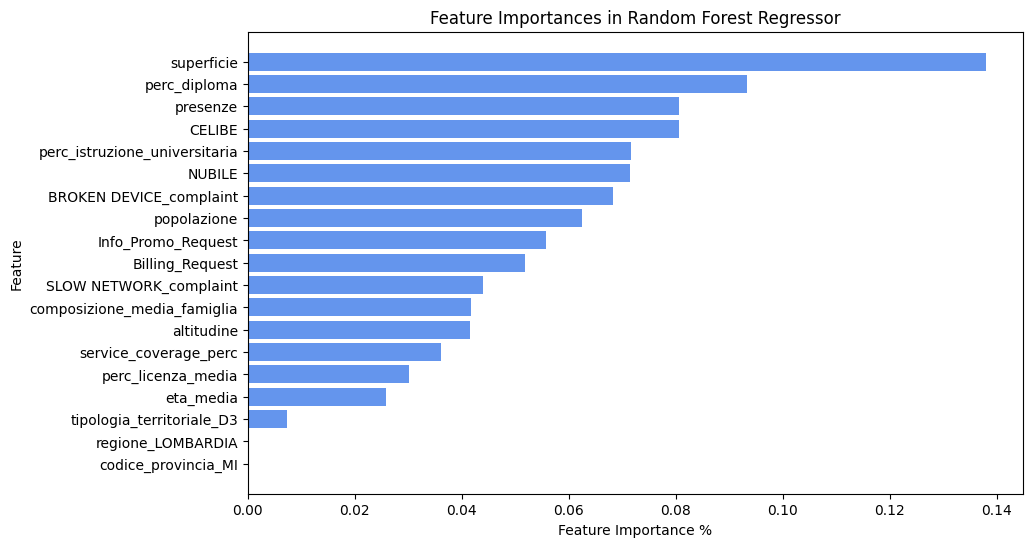

1.0000000000000002


In [ ]:
import matplotlib.pyplot as plt

regressor=grid_search.best_estimator_

# Retrieve feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='cornflowerblue')
plt.xlabel('Feature Importance %')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()
print(feature_importances.sum())

In [ ]:
!pip install shap
import shap
from shap import TreeExplainer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


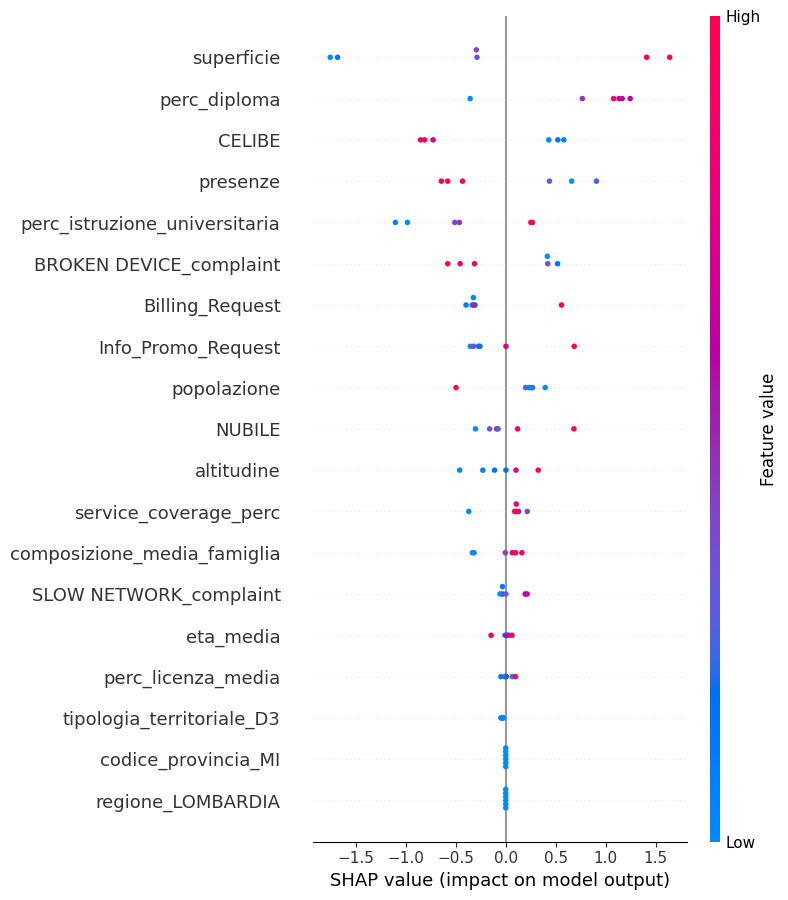

In [ ]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


<class 'shap._explanation.Explanation'>


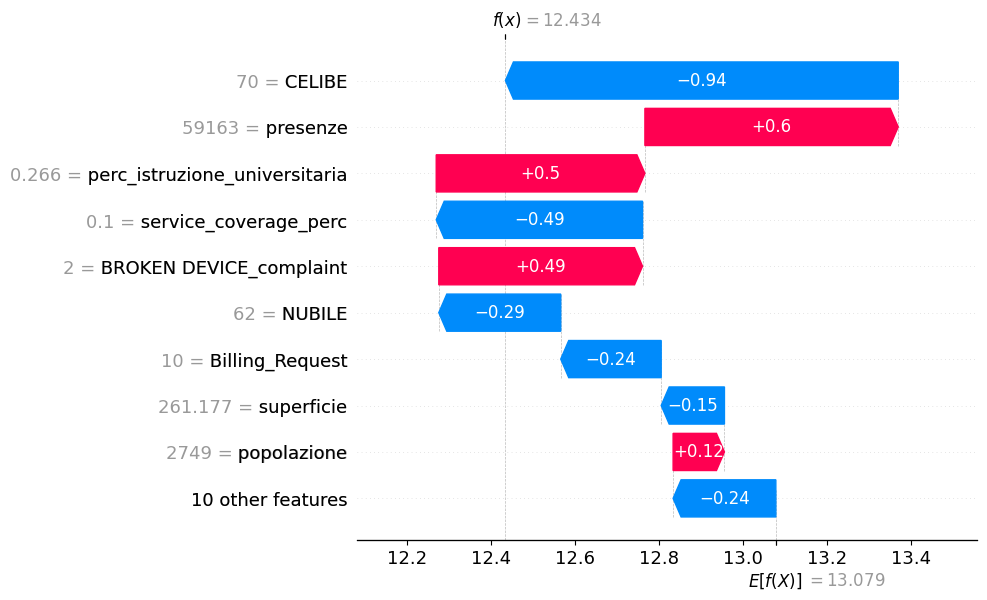

In [ ]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_test)
instance_index = 0
exp = explainer(X_train) # <-- here
print(type(exp))
shap.plots.waterfall(exp[0])

# DECISION TREE REGRESSOR SPLITS DIAGRAM

['composizione_media_famiglia', 'eta_media', 'perc_licenza_media', 'perc_diploma', 'perc_istruzione_universitaria', 'popolazione', 'CELIBE', 'NUBILE', 'superficie', 'altitudine', 'presenze', 'service_coverage_perc', 'SLOW NETWORK_complaint', 'BROKEN DEVICE_complaint', 'Billing_Request', 'Info_Promo_Request', 'regione_LOMBARDIA', 'codice_provincia_MI', 'tipologia_territoriale_D3']


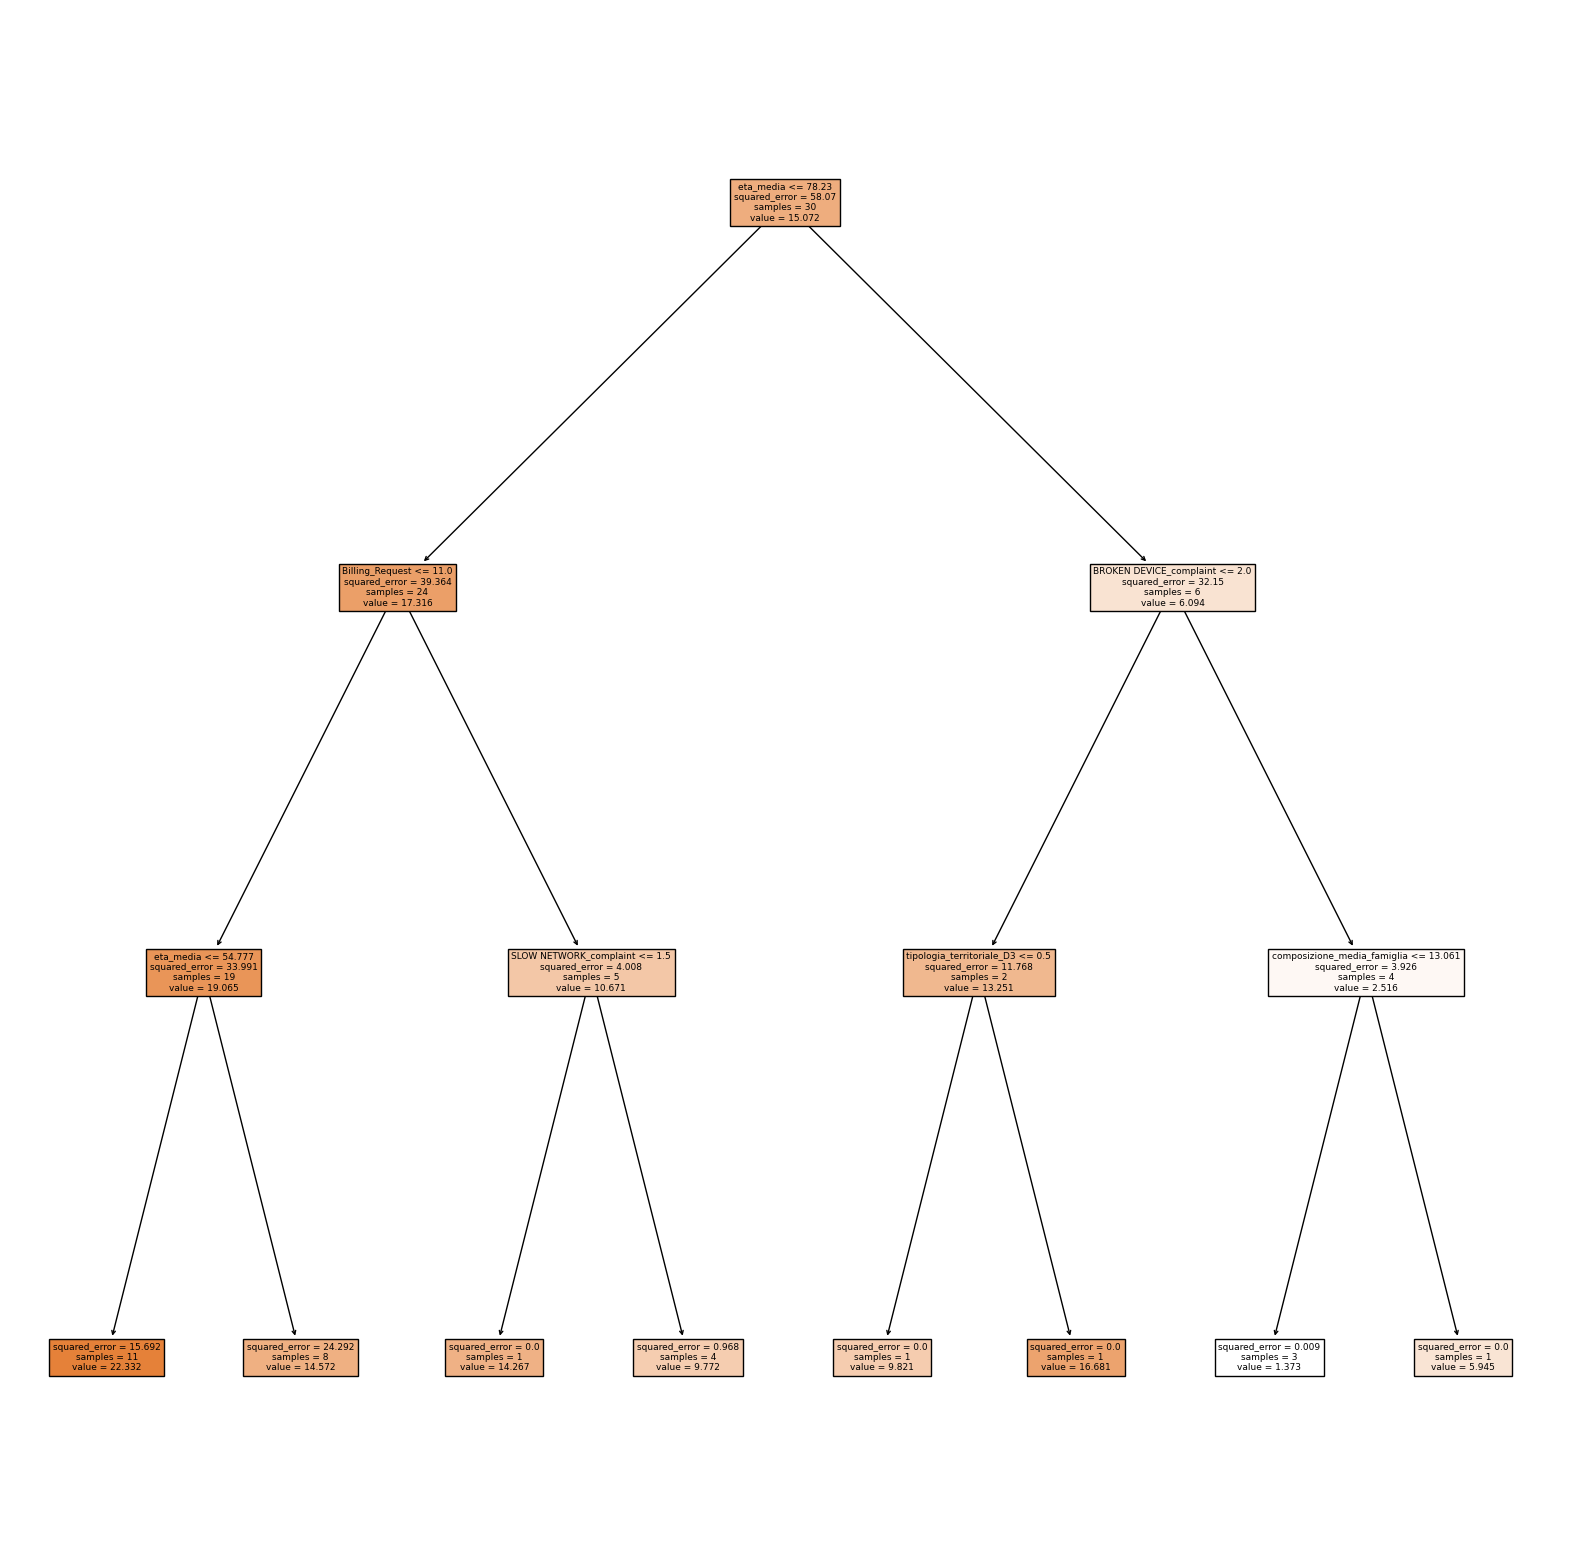

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere



# create a regressor object
regressor = DecisionTreeRegressor(random_state = 222, splitter="best", max_depth=3)  #se cambi il randomState da 0 a 222 noti che il primo nodo cambia

# fit the regressor with X and Y data
regressor.fit(X, y)
print(X.columns.to_list())
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20,20))


plot_tree(regressor, filled=True, feature_names=X.columns)

plt.show()


In [ ]:
X

,composizione_media_famiglia,eta_media,perc_licenza_media,perc_diploma,perc_istruzione_universitaria,popolazione,CELIBE,NUBILE,superficie,altitudine,presenze,service_coverage_perc,SLOW NETWORK_complaint,BROKEN DEVICE_complaint,Billing_Request,Info_Promo_Request,regione_LOMBARDIA,codice_provincia_MI,tipologia_territoriale_D3
0,7.3565,66.270204,0.0668,0.2898,0.2473,11889.0,41.0,95.0,18.8967,2018.0,7159.0,0.5,7.0,10.0,3.0,8.0,0.0,0.0,1.0
1,16.5037,71.310169,0.1463,0.2815,0.1193,17147.0,38.0,17.0,113.0050,4494.0,408886.0,0.2,10.0,14.0,11.0,1.0,0.0,0.0,0.0
2,10.4254,21.864502,0.0331,0.2612,0.2803,16374.0,20.0,45.0,163.9786,1514.0,113987.0,0.5,11.0,1.0,5.0,8.0,0.0,0.0,1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


[27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736 27.72945736
 24.97859537 24.97859537 24.97859537 24.97859537 24

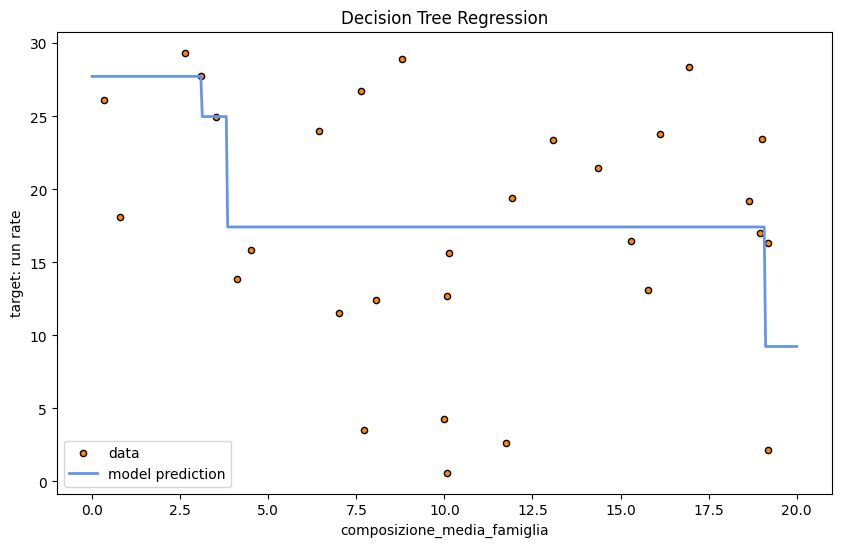

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


[17.42033555 17.42033555 17.42033555]


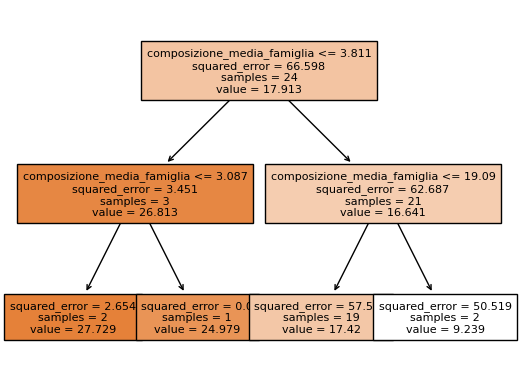

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
#X = np.sort(np.random.rand(100, 1) * 5, axis=0)
#y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split the data
XX=pd.DataFrame(X.composizione_media_famiglia)

X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=0)



# Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

# Predict for the whole dataset (needed for visualization)
X_plot = np.linspace(0, 20, 500).reshape(-1, 1)
y_plot = regressor.predict(X_plot)
print(regressor.predict(X_plot))
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(XX, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_plot, y_plot, color="cornflowerblue", linewidth=2, label="model prediction")
plt.xlabel("composizione_media_famiglia")
plt.ylabel("target: run rate")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
plot_tree(regressor, filled=True, feature_names=XX.columns, fontsize=8)


print(regressor.predict(pd.DataFrame([10,11,12])))

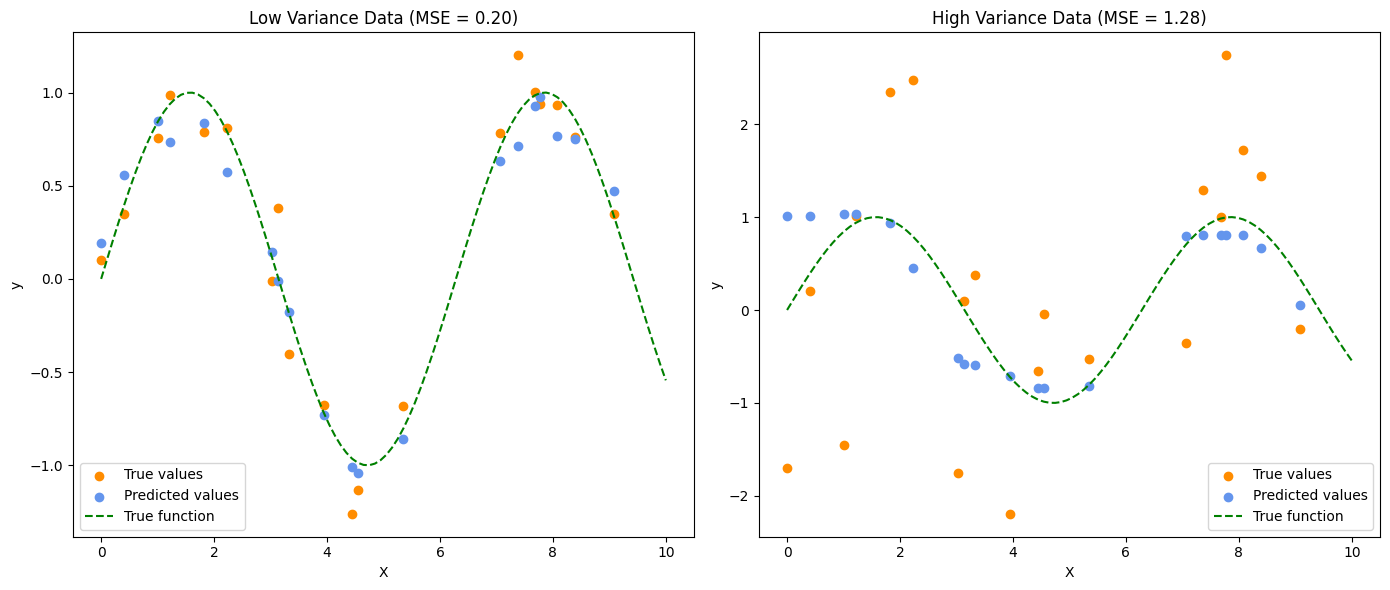

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Introduce some high variance to simulate a more complex and noisy dataset
y_high_variance = np.sin(X).ravel() + np.random.normal(0, 1.2, X.shape[0])

# Step 2: Train RandomForestRegressor on low variance data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_low_variance = RandomForestRegressor(n_estimators=100, random_state=42)
model_low_variance.fit(X_train, y_train)
y_pred_low = model_low_variance.predict(X_test)

# Step 2: Train RandomForestRegressor on high variance data
X_train, X_test, y_train_high, y_test_high = train_test_split(X, y_high_variance, test_size=0.2, random_state=42)
model_high_variance = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=20)
model_high_variance.fit(X_train, y_train_high)
y_pred_high = model_high_variance.predict(X_test)

# Step 3: Calculate MSE
mse_low = sqrt(mean_squared_error(y_test, y_pred_low))
mse_high = sqrt(mean_squared_error(y_test_high, y_pred_high))

# Step 4: Visualize predictions
plt.figure(figsize=(14, 6))

# Low variance plot
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color="darkorange", label="True values")
plt.scatter(X_test, y_pred_low, color="cornflowerblue", label="Predicted values")
plt.plot(X, np.sin(X), color="green", linestyle="--", label="True function")
plt.title(f"Low Variance Data (MSE = {mse_low:.2f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# High variance plot
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test_high, color="darkorange", label="True values")
plt.scatter(X_test, y_pred_high, color="cornflowerblue", label="Predicted values")
plt.plot(X, np.sin(X), color="green", linestyle="--", label="True function")
plt.title(f"High Variance Data (MSE = {mse_high:.2f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()
